## Feature Matching
### Take a Cheerios Cereal image and find in on super market shelf

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

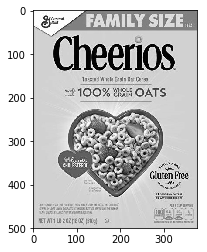

In [10]:
cheerios = cv2.imread('data/Cheerios.jpg',0)
plt.imshow(cheerios,cmap='gray')

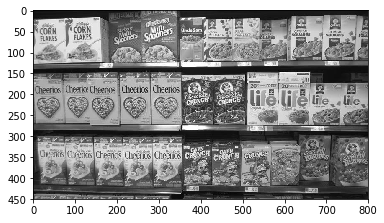

In [67]:
cereal_shelf = cv2.imread('data/Cheerios Shelf3.jpg',0)
plt.imshow(cereal_shelf,cmap='gray')

### BruteForce matching with SIFT (Scale-invariant feature transform) descriptors and ratio test

In [68]:
# create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

#find keypoint and descriptors with SIFT
kp1,des1 = sift.detectAndCompute(cheerios,None)
kp2,des2 = sift.detectAndCompute(cereal_shelf,None)

#BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

#apply ratio test

good =[] #empty list to hold good matches

for match1,match2 in matches:
    # if the match1 distance is less than 60% of match2 disctance (the lower the distance the better the match)
    if match1.distance < 0.60*match2.distance:
        good.append([match1])
        
sift_matches = cv2.drawMatchesKnn(cheerios,kp1,cereal_shelf,kp2,good,None,flags=2)

print("# of good",len(good))
print("# of matches",len(matches))

# of good 6
# of matches 1481


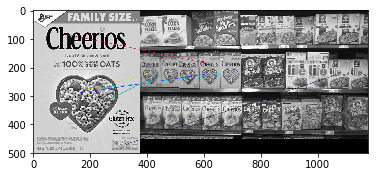

In [69]:
plt.imshow(sift_matches,cmap='gray')

In [70]:
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.60*match2.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

sift_matches = cv2.drawMatchesKnn(cheerios,kp1,cereal_shelf,kp2,matches,None,**draw_params)

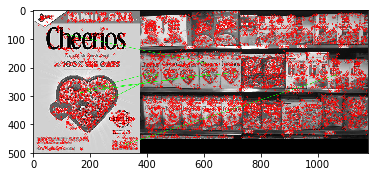

In [71]:
plt.imshow(sift_matches,cmap='gray')